ლექცია მთლიანად დაეთმობა რეგრესიის ტიპის ამოცანას. დღეს განსხვავებით წინა ლექციისა განვიხილავთ უფრო კომპლექსურ მონაცემებს.გამოვიყენებთ წრფივ რეგრესიას (უკვე კროს–ვალიდაციის გამოყენებით), ავხსნით და გამოვიყენებთ "გადაწყვეტილეების ხეებს" (decission trees), ასევე ავხსნით და გამოვიყენებთ random forrest–ალგორითმს. შევადარებთ მიღებულ შედეგებს ერთმანეთს. შემდგომ მოვახდენთ ჰიპერმაპრამეტრების ოპტიმიზაციას და მთლიანად შევკრავთ მოდელირების ციკლს.


In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('cancer_reg.csv')

In [4]:
df.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [6]:
df.shape

(3047, 34)

In [7]:
df.isna().sum().sum()

3046

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  avghouseholdsize         3047 non-null   float64
 14  percentmarried          

In [9]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

pctsomecol18_24            0.749918
pctprivatecoveragealone    0.199869
pctemployed16_over         0.049885
pctempprivcoverage         0.000000
pcths25_over               0.000000
pctbachdeg25_over          0.000000
pctunemployed16_over       0.000000
pctprivatecoverage         0.000000
pctpubliccoverage          0.000000
avgdeathsperyear           0.000000
pctpubliccoveragealone     0.000000
pctwhite                   0.000000
pctblack                   0.000000
pctasian                   0.000000
pctotherrace               0.000000
pctmarriedhouseholds       0.000000
pctbachdeg18_24            0.000000
avganncount                0.000000
pcths18_24                 0.000000
pctnohs18_24               0.000000
percentmarried             0.000000
avghouseholdsize           0.000000
geography                  0.000000
medianagefemale            0.000000
medianagemale              0.000000
medianage                  0.000000
binnedinc                  0.000000
studypercap                0

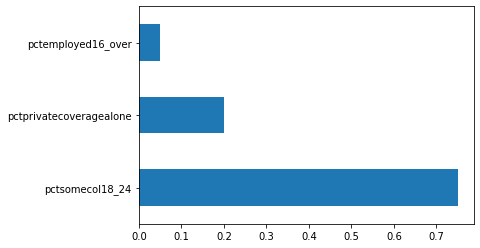

In [10]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

In [11]:
df.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'avghouseholdsize', 'percentmarried', 'pctnohs18_24', 'pcths18_24',
       'pctsomecol18_24', 'pctbachdeg18_24', 'pcths25_over',
       'pctbachdeg25_over', 'pctemployed16_over', 'pctunemployed16_over',
       'pctprivatecoverage', 'pctprivatecoveragealone', 'pctempprivcoverage',
       'pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack',
       'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

In [12]:
def more_than_seventy_percent_of_nan(X):
    droped_columns = []
    for col in list(X.columns):
            if X[col].isnull().mean() > 0.7:
                droped_columns.append(col)
    X =  X.drop(columns=droped_columns, axis=1)
    return X, droped_columns

In [13]:
df, droped_columns=more_than_seventy_percent_of_nan(df)

In [14]:
droped_columns

['pctsomecol18_24']

In [15]:
import seaborn as sns

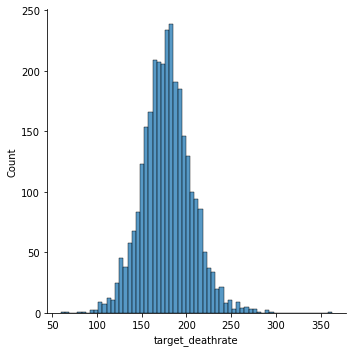

In [18]:
sns.displot(df.target_deathrate)

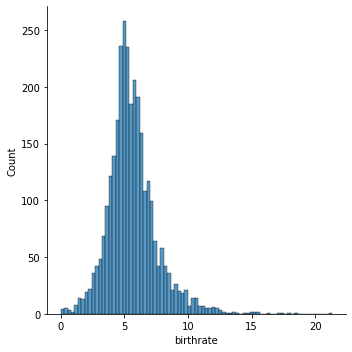

In [19]:
sns.displot(df.birthrate)

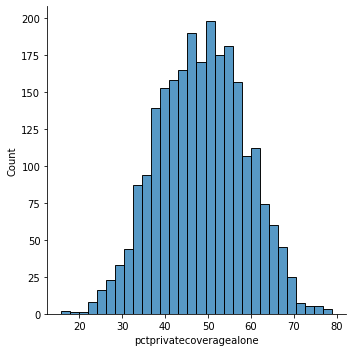

In [20]:
sns.displot(df.pctprivatecoveragealone)

In [21]:
problem_type = 'Regression'
target='target_deathrate'

In [22]:
def drop_dublicates(X):

    X.drop_duplicates(keep='first', inplace=True)
    X.dropna(axis='index', how='all', inplace=True)
    X.dropna(axis='columns', how='all', inplace=True) 
    return X

In [23]:
df=drop_dublicates(df)

In [24]:
df.shape

(3047, 33)

In [25]:
def replace_most_pop_miss(X):

    if len(list(X.select_dtypes(include=['object']).columns)) > 0:
        X.replace(dict.fromkeys(['?', 'n/a', 'nan', 'NaN', ',', 'N/a', 'N/A', 'none', '*', '.'], np.nan), inplace=True)


        X = X.replace(r'^\s*$', np.nan, regex=True)

    return X

In [26]:
df=replace_most_pop_miss(df)

In [27]:
def check_columns_type_with_Nan_replace(X, column):
            # need to define int column with NaN(should be float type)
            X[column] = X[column].fillna(0)
            count_int = 0
            lenth = len(X[column])


            for i in X[column]:
                try:
                    if i%1 == 0:
                        count_int +=1
                except:
                    continue
            if count_int == lenth:
                
                X[column]=X[column].astype(int)
            return X[column]

In [28]:
def define_columns_type(X):
    high_card_features_ls = []
    cat_features_ls = []
    num_features_ls = []
    
    X = pd.DataFrame.copy(X)
    for column in X.columns:     
            # if number of unique values more than 63, that column should be categorical
            # if column numerical
            if (X[column].dtype in [int, float]):
                
                
                # try to replace Nan and check column type
                X[column] = check_columns_type_with_Nan_replace(X, column)
                #check if column 'int'
                if X[column].dtype in [int]:
                    if X[column].nunique()>40:
                        num_features_ls.append(column)
                    else:
                        cat_features_ls.append(column)

                else:
                    num_features_ls.append(column)

            # check object columns   
            elif (X[column].nunique()>40):
                num_features_ls.append(column)
            else:
                cat_features_ls.append(column)

    return cat_features_ls, num_features_ls

In [29]:
cat_features_ls, num_features_ls =  define_columns_type(df.drop(columns=target))

In [30]:
num_features_ls

['avganncount',
 'avgdeathsperyear',
 'incidencerate',
 'medincome',
 'popest2015',
 'povertypercent',
 'studypercap',
 'medianage',
 'medianagemale',
 'medianagefemale',
 'geography',
 'avghouseholdsize',
 'percentmarried',
 'pctnohs18_24',
 'pcths18_24',
 'pctbachdeg18_24',
 'pcths25_over',
 'pctbachdeg25_over',
 'pctemployed16_over',
 'pctunemployed16_over',
 'pctprivatecoverage',
 'pctprivatecoveragealone',
 'pctempprivcoverage',
 'pctpubliccoverage',
 'pctpubliccoveragealone',
 'pctwhite',
 'pctblack',
 'pctasian',
 'pctotherrace',
 'pctmarriedhouseholds',
 'birthrate']

In [31]:
cat_features_ls

['binnedinc']

In [32]:
df['geography'].nunique()

3047

In [34]:
df[['geography']]

,geography
0,"Kitsap County, Washington"
1,"Kittitas County, Washington"
2,"Klickitat County, Washington"
3,"Lewis County, Washington"
4,"Lincoln County, Washington"
...,...
3042,"Ellsworth County, Kansas"
3043,"Finney County, Kansas"
3044,"Ford County, Kansas"
3045,"Franklin County, Kansas"


In [35]:
df[['city', 'state']] = df['geography'].str.split(',', 1, expand=True)

In [37]:
df[['city', 'state']]

,city,state
0,Kitsap County,Washington
1,Kittitas County,Washington
2,Klickitat County,Washington
3,Lewis County,Washington
4,Lincoln County,Washington
...,...,...
3042,Ellsworth County,Kansas
3043,Finney County,Kansas
3044,Ford County,Kansas
3045,Franklin County,Kansas


In [39]:
df['city'].nunique()

1819

In [70]:
#df.drop(['city'], axis=1, inplace=True)
df.drop(['geography'], axis=1, inplace=True)

In [41]:
df.shape

(3047, 34)

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
def encod(df):
    le = LabelEncoder()
    df['state'] = le.fit_transform(df['state'].astype(str))
    df['binnedinc'] = le.fit_transform(df['binnedinc'].astype(str))       
    return df

In [44]:
df=encod(df)

In [69]:
x_test[['state', 'binnedinc','geography']]

,state,binnedinc,geography
1582,37,3,"Linn County, Oregon"
2367,13,4,"Champaign County, Illinois"
2091,32,8,"Saratoga County, New York"
343,22,1,"Montmorency County, Michigan"
2661,10,5,"Barrow County, Georgia"
...,...,...,...
845,18,5,"Terrebonne Parish, Louisiana"
2310,10,0,"Wilkinson County, Georgia"
1412,6,7,"New Haven County, Connecticut"
2472,23,7,"Goodhue County, Minnesota"


In [47]:
df.binnedinc.value_counts()

4    306
7    306
9    306
6    305
3    305
5    305
0    304
2    304
1    304
8    302
Name: binnedinc, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x = df.drop(columns=target)
y = df[target]        
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state=42)

In [73]:
x_train.isna().sum().sum()

601

In [74]:
x_test.isna().sum().sum()

160

In [75]:
x_train['pctprivatecoveragealone'] = x_train['pctprivatecoveragealone'].fillna(value=x_train['pctprivatecoveragealone'].median())
x_test['pctprivatecoveragealone'] = x_test['pctprivatecoveragealone'].fillna(value=x_test['pctprivatecoveragealone'].median())

x_train['pctemployed16_over'] = x_train['pctemployed16_over'].fillna(value=x_train['pctemployed16_over'].median())
x_test['pctemployed16_over'] = x_test['pctemployed16_over'].fillna(value=x_test['pctemployed16_over'].median())

C:\Users\George Ch\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\George Ch\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\George Ch\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [76]:
x_train['state']

2830    41
1188    50
887     20
1924    43
2921    13
        ..
1638    35
1095    21
1130    49
1294    16
860     19
Name: state, Length: 2437, dtype: int32

In [77]:
df_train=pd.merge(x_train, y_train, left_index=True, right_index=True)

In [78]:
df_test=pd.merge(x_test, y_test, left_index=True, right_index=True)

In [79]:
df_train.to_csv('cancer_train.csv')

In [80]:
df_test.to_csv('cancer_test.csv')

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler()

In [83]:
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [86]:
reg = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(reg, x_train, y_train, scoring='r2', cv=folds)
scores 

array([0.52590345, 0.54758903, 0.4589473 , 0.52415307, 0.47806513])

In [87]:
reg.fit(x_train, y_train)

LinearRegression()

In [88]:
print(reg.score(x_train, y_train))

0.5285978904961228


In [89]:
y_pred = reg.predict(x_test)

In [90]:
print(reg.score(x_test, y_test))

0.4965811380891392
